# Import Libraries

In [252]:
pip install gensim


In [34]:
pip install --upgrade scipy


Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [36]:
import scipy
print(scipy.__version__)


1.14.1


In [37]:
from numpy import triu


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import os
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, roc_curve, auc, RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from collections import OrderedDict
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utilss import to_categorical
from sklearn.preprocessing import LabelEncoder
import joblib
import h5py
import warnings 
warnings.filterwarnings('ignore')

    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


ModuleNotFoundError: No module named 'tensorflow.keras.utilss'

In [62]:
df1=pd.read_csv(r"C:\Users\hp\Downloads\train_product_data.csv")
df1.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


In [64]:
df1.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


In [66]:
df1=df1[['description', 'product_category_tree']]

In [68]:
df1.head()

,description,product_category_tree
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
2,Key Features of Alisha Solid Women's Cycling S...,Clothing
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear


In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   description            14998 non-null  object
 1   product_category_tree  14999 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB


In [72]:
df1.duplicated().sum()

1832

In [76]:
df1.isna().sum()/len(df1)*100

description              0.006667
product_category_tree    0.000000
dtype: float64

In [78]:
df1['description'].fillna(df1['description'].mode()[0], inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_12804\4272244125.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['description'].fillna(df1['description'].mode()[0], inplace=True)


In [82]:
df1.isna().sum()/len(df1)*100

description              0.0
product_category_tree    0.0
dtype: float64

In [ ]:
df1['product_category_tree'].value_counts()

NameError: name 'visuals_folder' is not defined

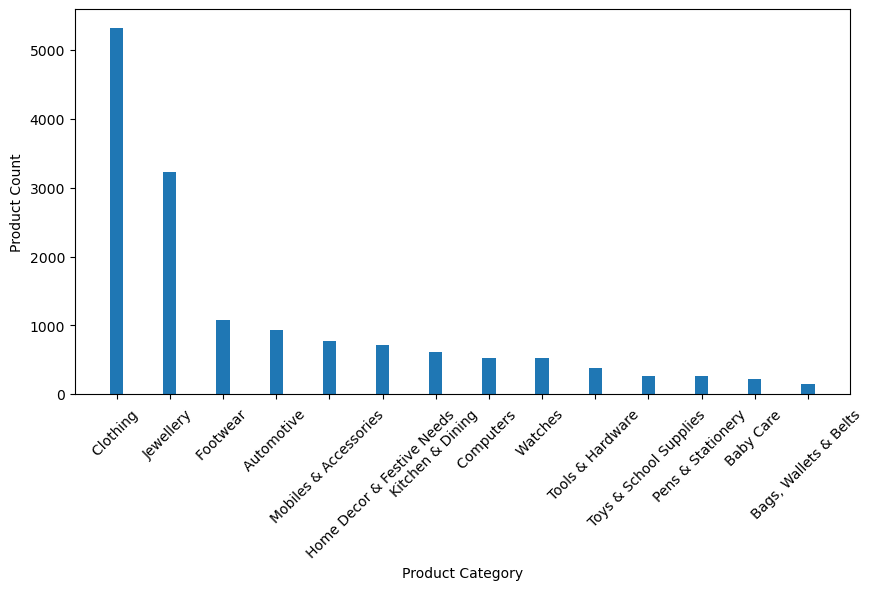

In [86]:
label_dist = df1['product_category_tree'].value_counts().to_dict()
fig = plt.figure(figsize = (10,5))
ax = plt.bar(label_dist.keys(), label_dist.values(), width=0.25)
plt.xticks(rotation = 45)
plt.xlabel("Product Category")
plt.ylabel("Product Count")

plt.savefig(visuals_folder)
plt.show()

In [88]:
x = df1[['description']]
y = df1['product_category_tree']
oversampler = RandomOverSampler(sampling_strategy='auto')

x_resampled, y_resampled = oversampler.fit_resample(x,y)

df1_resampled = x_resampled.copy()
df1_resampled['product_category_tree'] = y_resampled

print(df1_resampled['product_category_tree'].value_counts())

product_category_tree
Clothing                       5316
Footwear                       5316
Pens & Stationery              5316
Bags, Wallets & Belts          5316
Home Decor & Festive Needs     5316
Automotive                     5316
Tools & Hardware               5316
Baby Care                      5316
Mobiles & Accessories          5316
Watches                        5316
Toys & School Supplies         5316
Jewellery                      5316
Kitchen & Dining               5316
Computers                      5316
Name: count, dtype: int64


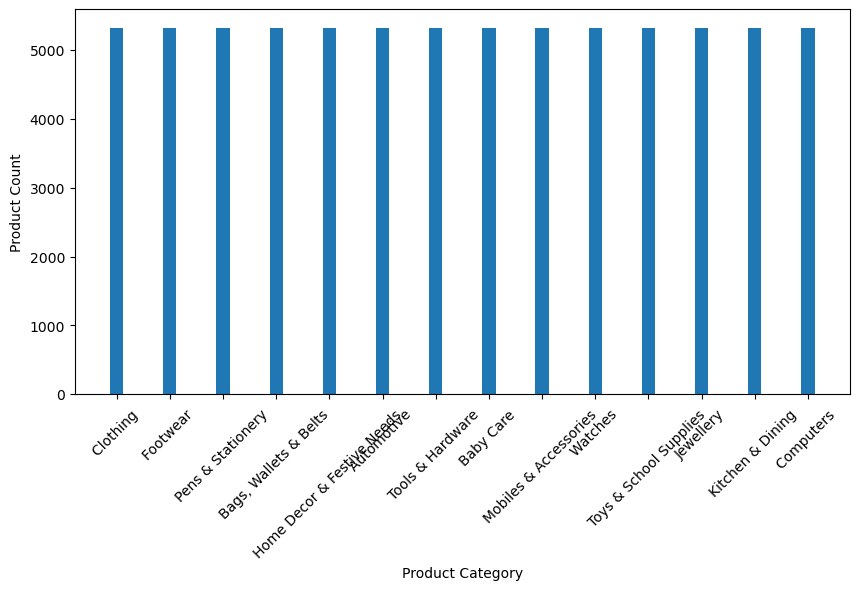

In [90]:
label_dist = df1_resampled['product_category_tree'].value_counts().to_dict()
fig = plt.figure(figsize=(10,5))
ax=plt.bar(label_dist.keys(), label_dist.values(), width=0.25)
plt.xticks(rotation = 45)
plt.xlabel("Product Category")
plt.ylabel("Product Count")

plt.show()

In [92]:
df1_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74424 entries, 0 to 74423
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   description            74424 non-null  object
 1   product_category_tree  74424 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [94]:
df1_resampled.head()

,description,product_category_tree
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
2,Key Features of Alisha Solid Women's Cycling S...,Clothing
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear


In [96]:
df1_resampled.isna().sum() /len(df1_resampled)*100

description              0.0
product_category_tree    0.0
dtype: float64

In [100]:
df1_resampled['description'] = df1_resampled['description'].astype(str)

In [102]:
df1_resampled.dtypes

description              object
product_category_tree    object
dtype: object

In [104]:
df1_resampled.duplicated().sum()

61257

In [106]:
df1_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74424 entries, 0 to 74423
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   description            74424 non-null  object
 1   product_category_tree  74424 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [110]:
df1_resampled['length']=df1_resampled['description'].apply(lambda x: len(x.split(' ')))

In [112]:
df1_resampled.head()

,description,product_category_tree,length
0,Key Features of Alisha Solid Women's Cycling S...,Clothing,64
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear,107
2,Key Features of Alisha Solid Women's Cycling S...,Clothing,63
3,Key Features of Alisha Solid Women's Cycling S...,Clothing,65
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear,64


In [114]:
df1_resampled['product_category_tree'].unique()

array(['Clothing ', 'Footwear ', 'Pens & Stationery ',
       'Bags, Wallets & Belts ', 'Home Decor & Festive Needs ',
       'Automotive ', 'Tools & Hardware ', 'Baby Care ',
       'Mobiles & Accessories ', 'Watches ', 'Toys & School Supplies ',
       'Jewellery ', 'Kitchen & Dining ', 'Computers '], dtype=object)

In [116]:
results = []
for x in df1_resampled['product_category_tree'].unique():
    mean_length = round(df1_resampled[df1_resampled['product_category_tree']==x]['length'].mean())
    results.append({'Category':x, 'MeanLength': mean_length})

mean_length_df1 = pd.DataFrame(results)

In [118]:
mean_length_df1

,Category,MeanLength
0,Clothing,64
1,Footwear,53
2,Pens & Stationery,58
3,"Bags, Wallets & Belts",83
4,Home Decor & Festive Needs,101
5,Automotive,82
6,Tools & Hardware,57
7,Baby Care,76
8,Mobiles & Accessories,127
9,Watches,59


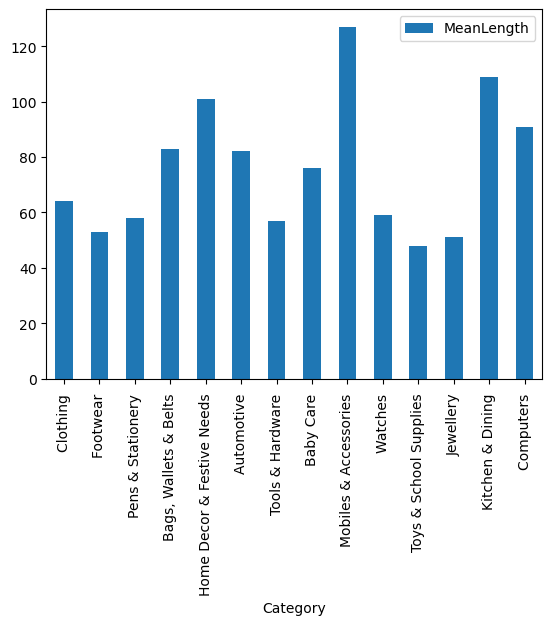

In [120]:
mean_length_df1.plot(kind = 'bar', x = 'Category', y = 'MeanLength')
plt.show()

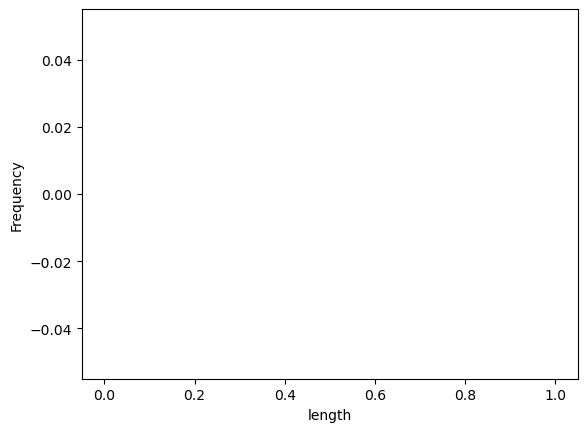

In [122]:
df1_resampled[df1_resampled['product_category_tree']=='Clothing']['length'].plot.hist(bins=10, alpha=0.3, label="Clothing")
df1_resampled[df1_resampled['product_category_tree']=='Footwear']['length'].plot.hist(bins=10, alpha=0.3, label="Footwear")
df1_resampled[df1_resampled['product_category_tree']=='Pens & Stationary']['length'].plot.hist(bins=10, alpha=0.3, label="Pens & Stationary")
df1_resampled[df1_resampled['product_category_tree']=='Bags, Wallets & Belts']['length'].plot.hist(bins=10, alpha=0.3, label="Bags, Wallets & Belts")
df1_resampled[df1_resampled['product_category_tree']=='Home Decor & Festive Needs']['length'].plot.hist(bins=10, alpha=0.3, label="Home Decor & Festive Needs")
df1_resampled[df1_resampled['product_category_tree']=='Automative']['length'].plot.hist(bins=10, alpha=0.3, label="Automative")
df1_resampled[df1_resampled['product_category_tree']=='Tools & Hardware']['length'].plot.hist(bins=10, alpha=0.3, label="Tools & Hardware")
df1_resampled[df1_resampled['product_category_tree']=='Baby Care']['length'].plot.hist(bins=10, alpha=0.3, label="Baby Care")
df1_resampled[df1_resampled['product_category_tree']=='Mobile & Accessories']['length'].plot.hist(bins=10, alpha=0.3, label="Mobile & Accessories")
df1_resampled[df1_resampled['product_category_tree']=='Watches']['length'].plot.hist(bins=10, alpha=0.3, label="Watches")
df1_resampled[df1_resampled['product_category_tree']=='Toys & School supplies']['length'].plot.hist(bins=10, alpha=0.3, label="Toys & School supplies")
df1_resampled[df1_resampled['product_category_tree']=='Jewellery']['length'].plot.hist(bins=10, alpha=0.3, label="Jewellery")
df1_resampled[df1_resampled['product_category_tree']=='Kitchen & Dinning']['length'].plot.hist(bins=10, alpha=0.3, label="Kitchen & Dinning")
df1_resampled[df1_resampled['product_category_tree']=='Computers']['length'].plot.hist(bins=10, alpha=0.3, label="Computers")
plt.xlabel("length")
plt.show()



In [124]:
STOPWORDS = set(stopwords.words('english'))

In [ ]:
STOPWORDS

In [ ]:
df1.resampled["clean_description"]=df1_resampled["description"].apply(lambda x: ' '.join([word for word in x.split() if word not in(STOPWORDS)]))

In [ ]:
df1_resampled = df1_resampled.drop('length', axis = 1)

In [132]:
df1_resampled['length']=df1_resampled['clean_description'].apply(lambda x: len(x.split(' ')))

KeyError: 'clean_description'

In [130]:
df1_resampled.head()

,description,product_category_tree,length
0,Key Features of Alisha Solid Women's Cycling S...,Clothing,64
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear,107
2,Key Features of Alisha Solid Women's Cycling S...,Clothing,63
3,Key Features of Alisha Solid Women's Cycling S...,Clothing,65
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear,64


In [157]:
results = []
for x in df1_resampled['product_category_tree'].unique():
    mean_length = round(df1_resampled[df1_resampled['product_category_tree']==x]['length'].mean())
    results.append({'Category': x, 'MeanLength': mean_length})

mean_length_df = pd.DataFrame(results)

In [159]:
mean_length_df1

,Category,MeanLength
0,Clothing,64
1,Footwear,53
2,Pens & Stationery,58
3,"Bags, Wallets & Belts",83
4,Home Decor & Festive Needs,101
5,Automotive,82
6,Tools & Hardware,57
7,Baby Care,76
8,Mobiles & Accessories,127
9,Watches,59


In [144]:
df1.duplicated().sum()
df1.drop_duplicates(inplace=True)

In [146]:
x=df1.drop('product_category_tree', axis=1)

In [148]:
y=df1['product_category_tree']

In [154]:
df1.head()

,description,product_category_tree
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
2,Key Features of Alisha Solid Women's Cycling S...,Clothing
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear


In [169]:
x_train, x_test, y_train, y_test = train_test_split(df1_resampled["description"],
                                                   df1_resampled["product_category_tree"], test_size=0.2,
                                                   stratify=df1_resampled['product_category_tree'])

In [171]:
print(x_train.shape[0], x_test.shape[0])

59539 14885


In [173]:
print(y_train.value_counts())

product_category_tree
Baby Care                      4253
Pens & Stationery              4253
Home Decor & Festive Needs     4253
Kitchen & Dining               4253
Watches                        4253
Clothing                       4253
Toys & School Supplies         4253
Automotive                     4253
Bags, Wallets & Belts          4253
Jewellery                      4253
Mobiles & Accessories          4253
Computers                      4252
Footwear                       4252
Tools & Hardware               4252
Name: count, dtype: int64


In [175]:
print(y_test.value_counts())

product_category_tree
Tools & Hardware               1064
Footwear                       1064
Computers                      1064
Mobiles & Accessories          1063
Bags, Wallets & Belts          1063
Home Decor & Festive Needs     1063
Pens & Stationery              1063
Watches                        1063
Kitchen & Dining               1063
Toys & School Supplies         1063
Automotive                     1063
Jewellery                      1063
Clothing                       1063
Baby Care                      1063
Name: count, dtype: int64


In [177]:
x_train

21684    Buy Offspring Solid Single Blanket Peach at Rs...
58678    Flipkart.com: Buy Tootpado Art Plastic Punches...
41832    Buy S C Handicrafts Showpiece  -  62 cm for Rs...
30418    Key Features of Hako 85W Magsafe Laptop Charge...
38652    MCB Exports Mini 6 Drawer Chest Showpiece  -  ...
                               ...                        
8555     i-KitPit Pouch for Lenovo A369i (Black)\n     ...
5592     Flipkart.com: Buy Tootpado Signature Transform...
33910    Lapguard SONY VAIO VGN-NW270DB_90 90 Adapter (...
9669     Vero Moda Casual Short Sleeve Solid Women's To...
29891    Shopfloor.XYZ Vacuum Cleaner for Computers, La...
Name: description, Length: 59539, dtype: object

In [ ]:
train_sentences = [word_tokenize(description.lower()) for description in x_train]
train_sentences = [word_tokenize(description.lower()) for description in x_test]

In [186]:
train_sentences

[['key',
  'features',
  'of',
  'furst',
  'usb',
  'adapter',
  'with',
  'cable',
  'for',
  'xp',
  'miro',
  'battery',
  'charger',
  'for',
  'sony',
  'xperia',
  'miro',
  '1.25a',
  '.',
  'wall',
  'charger',
  'universal',
  'voltage',
  'detachable',
  'usb',
  'cable',
  ',',
  'furst',
  'usb',
  'adapter',
  'with',
  'cable',
  'for',
  'xp',
  'miro',
  'battery',
  'charger',
  '(',
  'white',
  ')',
  'price',
  ':',
  'rs',
  '.',
  '249',
  'furst',
  'detachable',
  'usb',
  'charger',
  'with',
  'indicator',
  'has',
  'competitive',
  'price',
  '&',
  'high',
  'quality.it',
  'is',
  'easily',
  'portable',
  '&',
  'small',
  'enough',
  'to',
  'carry',
  'in',
  'your',
  'pocket',
  'with',
  'new',
  'fast',
  'charge',
  'technology.',
  ',',
  'specifications',
  'of',
  'furst',
  'usb',
  'adapter',
  'with',
  'cable',
  'for',
  'xp',
  'miro',
  'battery',
  'charger',
  '(',
  'white',
  ')',
  'in',
  'the',
  'box',
  'sales',
  'package',
  '

In [229]:
pip install --upgrade scipy


In [258]:
import numpy as np
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
upper_triangle = np.triu(matrix)
print(upper_triangle)


[[1 2 3]
 [0 5 6]
 [0 0 9]]


In [264]:
from gensim.models import Word2Vec
word2vec = Word2Vec(sentences=train_sentences, vector_size=100, window=5, min_count=1, workers=4, sg=1)


ImportError: cannot import name 'triu' from 'scipy.linalg' (C:\Users\hp\anaconda3\Lib\site-packages\scipy\linalg\__init__.py)

In [256]:
word2vec_model

NameError: name 'word2vec_model' is not defined

In [268]:
accuracy_score(y_test, y_pred_rf)

NameError: name 'y_pred_rf' is not defined